In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Objective 1: Scan and handle missing values and inconsistencies


df['lunch'].fillna(df['lunch'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)


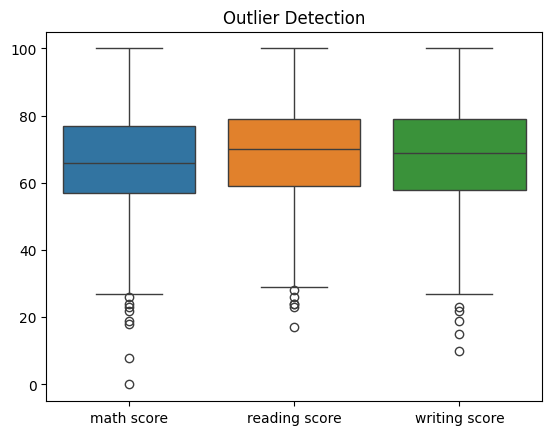

In [15]:
# outlier detection using IQR method
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Outlier Detection")
plt.show()


In [8]:
def detect_outliers(df,feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lowerlimit = q1 - 1.5 * iqr
    upperlimit = q3 + 1.5 * iqr
    return df[(df[feature] < lowerlimit) | (df[feature] > upperlimit)]

In [16]:
detect_outliers(df, "math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [10]:
detect_outliers(df, "reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [11]:
detect_outliers(df, "reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
# Data Transformation
# min-max normalization
df['math score (normalized)'] = (df['math score'] - df['math score'].min()) / (df['math score'].max() - df['math score'].min())
df['reading score (normalized)'] = (df['reading score'] - df['reading score'].min()) / (df['reading score'].max() - df['reading score'].min())
df['writing score (normalized)'] = (df['writing score'] - df['writing score'].min()) / (df['writing score'].max() - df['writing score'].min())

In [ ]:
# Z score normalization
df['math score (z-score)'] = (df['math score'] - df['math score'].mean()) / df['math score'].std()
df['reading score (z-score)'] = (df['reading score'] - df['reading score'].mean()) / df['reading score'].std()
df['writing score (z-score)'] = (df['writing score'] - df['writing score'].mean()) / df['writing score'].std()